In [1]:
import numpy as np
import pandas as pd

In [2]:
# read iris dataset
data = pd.read_csv(r'iris.csv', header=0)

In [3]:
data
# data.head()
# data.tail()
# data.sample()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
data['variety'] = data['variety'].map({'Virginica':0, 'Setosa':1, 'Versicolor':2})

In [5]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [6]:
# Check whether duplicate data sets exist. If yes, delete them.
print('Number of data: ', len(data))
if data.duplicated().any() == True:
    data.drop_duplicates(inplace=True)
    print('Duplicate data sets have been deleted.')
    print('Number of data: ', len(data))
else:
    print('There are no duplicate data sets')

Number of data:  150
Duplicate data sets have been deleted.
Number of data:  149


In [7]:
# Check the number of irises in each type
data['variety'].value_counts()

1    50
2    50
0    49
Name: variety, dtype: int64

In [8]:
# Use KNN to classify
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self, X, y):
        """
        Training Method
        :param X: Sample characteristics to be trained, [samples_num, features_num]
        :param y: Target value for each sample (label), [samples_num]
        """
        self.X = np.asarray(X)
        self.y = np.asarray(y)
    def predict(self, X):
        """
        Use the samples passed by parameters to predict
        :param X: Sample characteristics to be predicted, [samples_num, features_num]
        :return: the outcome
        """
        X = np.asarray(X)
        result = []

        for x in X:
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            idx = dis.argsort()
            idx = idx[:self.k]
            cnt = np.bincount(self.y[idx])
            result.append(cnt.argmax())

        return np.asarray(result)

In [9]:
# Extract data of each type of iris
t0 = data[data['variety']==0]
t1 = data[data['variety']==1]
t2 = data[data['variety']==2]

t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)

train_X = pd.concat([t0.iloc[0:40, :-1], t1.iloc[0:40, :-1], t2.iloc[0:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)

test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

# Create objects for training and testing
knn = KNN(k=3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
# display(result)
# display(test_y)
display(np.sum(result == test_y))
display(len(result))
display(np.sum(result == test_y)/len(result))

28

29

0.9655172413793104

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


In [11]:
#mpl.rcParams['font.family'] = 'SimHei'
#mpl.rcParams['axes.unicode_minus'] = False

C:\Users\Wu Kaixiang\AppData\Local\Temp\ipykernel_24780\3833101308.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(x=t0['sepal.length'][:40], y=t0['petal.length'][:40], color='r', label='Virginica')
C:\Users\Wu Kaixiang\AppData\Local\Temp\ipykernel_24780\3833101308.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(x=t1['sepal.length'][:40], y=t1['petal.length'][:40], color='g', label='Setosa')
C:\Users\Wu Kaixiang\AppData\Local\Temp\ipykernel_24780\3

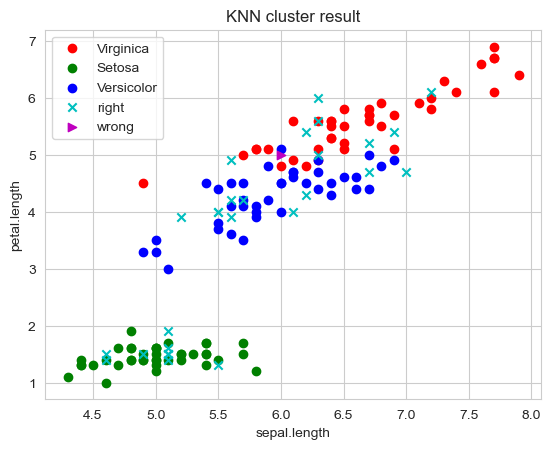

In [12]:
# Draw the training set data
plt.scatter(x=t0['sepal.length'][:40], y=t0['petal.length'][:40], color='r', label='Virginica')
plt.scatter(x=t1['sepal.length'][:40], y=t1['petal.length'][:40], color='g', label='Setosa')
plt.scatter(x=t2['sepal.length'][:40], y=t2['petal.length'][:40], color='b', label='Versicolor')

# Draw the testing set data
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right['sepal.length'], y=right['petal.length'], color='c', marker='x', label='right')
plt.scatter(x=wrong['sepal.length'], y=wrong['petal.length'], color='m', marker='>', label='wrong')
plt.xlabel('sepal.length')
plt.ylabel('petal.length')
plt.title('KNN cluster result')
plt.legend(loc='best')
plt.show()